In [124]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [345]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [125]:
loc_file = '/Users/fuwang/Documents/Columbia/Fall 2022/5243/Group Project 2/fall2022-project2-group11-ferra/data/LinkNYC_Locations.csv'
usage_file = '/Users/fuwang/Documents/Columbia/Fall 2022/5243/Group Project 2/fall2022-project2-group11-ferra/data/LinkNYC_Usage_Statistics_Historical_Data.csv'

In [327]:
df_loc = pd.read_csv(loc_file)
df_usage = pd.read_csv(usage_file)

In [127]:
df_loc.shape,df_usage.shape

((1996, 21), (200, 9))

## Thoughts: 
1. General overall look, Sanity Check: any missing values, outliers 
2. Convert datetime-like string to datetime, and usage time (format %H:%M:%S) to datetime so that we could analyze the trending of numeric value over the time period
3. Removing features that are irrelevant to our analysis and also adding new features that will contribute to our furthur analysis 

In [128]:
df_loc.keys()

Index(['CB Link ID', 'Borough', 'Community Board', 'Council District',
       'Latitude', 'Longitude', 'Project Status', 'Smallest PPT',
       'Street Address', 'Postcode', 'Link Site ID',
       'Link Smoke Tested and Activated (A)', 'Link Installation (A)',
       'Neighborhood Tabulation Area (NTA)',
       'Building Identification Number (BIN)', 'Borough-Block-Lot (BBL)',
       'Census Tract (CT)', 'Cross Street 1', 'Cross Street 2', 'IxN Corner',
       'Location'],
      dtype='object')

In [129]:
df_loc.rename(columns={'Link Smoke Tested and Activated (A)':'Active_date',
                      'Link Installation (A)':'Install_date',
                      'Neighborhood Tabulation Area (NTA)':'neighborhood',
                      },inplace=True)

In [130]:
# df_usage['Week'] = pd.to_datetime(df_usage.Week.str[7:])
df_loc['Active_date'] = pd.to_datetime(df_loc['Active_date'])
df_loc['Install_date'] = pd.to_datetime(df_loc['Install_date'])

In [131]:
df_loc.head()

,CB Link ID,Borough,Community Board,Council District,Latitude,Longitude,Project Status,Smallest PPT,Street Address,Postcode,...,Active_date,Install_date,neighborhood,Building Identification Number (BIN),Borough-Block-Lot (BBL),Census Tract (CT),Cross Street 1,Cross Street 2,IxN Corner,Location
0,LINK-000491,Manhattan,104,3,40.763051,-73.985830,Live,122605,308 WEST 51 STREET,10019,...,2016-10-26,2016-10-15,Clinton,1025211.0,1.010428e+09,1013300.0,8 AVENUE,9 AVENUE,NW,"(40.76305136, -73.98583017)"
1,LINK-012865,Manhattan,106,4,40.759234,-73.965504,Live,121773,1077 2 AVENUE,10022,...,2018-06-12,2018-04-07,Turtle Bay-East Midtown,1090233.0,1.013308e+09,1010800.0,EAST 57 STREET,EAST 56 STREET,SW,"(40.75923366, -73.96550379)"
2,LINK-001486,Manhattan,107,6,40.790235,-73.974793,Live,133633,2420 BROADWAY,10024,...,2017-10-25,2017-09-10,Upper West Side,1033308.0,1.012370e+09,1017500.0,WEST 89 STREET,WEST 90 STREET,NE,"(40.790235, -73.974793)"
3,NaN,Bronx,202,17,40.816958,-73.895714,Live,113121,809 SOUTHERN BOULEVARD,10459,...,2022-05-25,2021-11-11,Hunts Point,2005741.0,2.027210e+09,2008900.0,LONGWOOD AVENUE,INTERVALE AVENUE,MIDBLOCK,"(40.81695812880762, -73.8957139698328)"
4,LINK-000220,Manhattan,105,3,40.739336,-73.995264,Live,123137,592 6 AVENUE,10011,...,2018-04-04,2018-02-04,Hudson Yards-Chelsea-Flatiron-Union Square,1015407.0,1.008198e+09,1005400.0,WEST 18 STREET,WEST 17 STREET,NE,"(40.73933558, -73.99526424)"


In [132]:
for item in df_loc.keys():
    print('The type of this variable',item ,'is ', type(df_loc[item][0]))

The type of this variable CB Link ID is  <class 'str'>
The type of this variable Borough is  <class 'str'>
The type of this variable Community Board is  <class 'numpy.int64'>
The type of this variable Council District is  <class 'numpy.int64'>
The type of this variable Latitude is  <class 'numpy.float64'>
The type of this variable Longitude is  <class 'numpy.float64'>
The type of this variable Project Status is  <class 'str'>
The type of this variable Smallest PPT is  <class 'str'>
The type of this variable Street Address is  <class 'str'>
The type of this variable Postcode is  <class 'numpy.int64'>
The type of this variable Link Site ID is  <class 'str'>
The type of this variable Active_date is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
The type of this variable Install_date is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
The type of this variable neighborhood is  <class 'str'>
The type of this variable Building Identification Number (BIN) is  <class 'numpy.float64'>
T

In [57]:
df_loc.describe()

,Community Board,Council District,Latitude,Longitude,Postcode,Building Identification Number (BIN),Borough-Block-Lot (BBL),Census Tract (CT)
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1.979000e+03,1.995000e+03,1.966000e+03
mean,193.871743,13.842685,40.756897,-73.952227,10420.837675,1.937940e+06,1.897722e+09,1.851699e+06
std,120.603414,13.025685,0.055030,0.048712,547.546783,1.244887e+06,1.221008e+09,1.218037e+06
min,101.000000,1.000000,40.561755,-74.116075,10001.000000,1.000000e+06,1.000328e+09,3.030000e+02
25%,106.000000,4.000000,40.730568,-73.982566,10019.000000,1.034792e+06,1.010660e+09,1.010200e+06
50%,109.000000,7.000000,40.754708,-73.962891,10031.000000,1.076374e+06,1.019050e+09,1.019500e+06
75%,303.000000,25.000000,40.795602,-73.929248,11103.000000,3.040240e+06,3.012710e+09,3.015550e+06
max,503.000000,50.000000,40.875751,-73.755939,11435.000000,5.158060e+06,5.039830e+09,5.018100e+06


In [59]:
df_loc[df_loc.Active_date<df_loc.Install_date] # no outliers for install and activation date 

,CB Link ID,Borough,Community Board,Council District,Latitude,Longitude,Project Status,Smallest PPT,Street Address,Postcode,...,Active_date,Install_date,neighborhood,Building Identification Number (BIN),Borough-Block-Lot (BBL),Census Tract (CT),Cross Street 1,Cross Street 2,IxN Corner,Location


In [253]:
df_loc.isnull().sum().sort_values(ascending=False)
# There are some missing values, and we will take a deeper look in a bit later 

CB Link ID                              123
Link Smoke Tested and Activated (A)      51
Census Tract (CT)                        30
IxN Corner                               17
Building Identification Number (BIN)     17
Smallest PPT                              8
Cross Street 2                            4
Cross Street 1                            4
Borough-Block-Lot (BBL)                   1
Neighborhood Tabulation Area (NTA)        1
Link Installation (A)                     0
Link Site ID                              0
Borough                                   0
Postcode                                  0
Street Address                            0
Project Status                            0
Longitude                                 0
Latitude                                  0
Council District                          0
Community Board                           0
Location                                  0
dtype: int64

In [255]:
print('The number of duplicated row is', df_loc.duplicated().sum())

The number of duplicated row is 0


# Cleaning for df_usage


In [328]:
df_usage.isnull().sum().sort_values(ascending=False)

Average Session Duration                         1
Week                                             0
Sessions Per Week                                0
Cumulative Sessions To Date                      0
Bandwidth Utilization Per Week (TB)              0
Cumulative Bandwidth Utilization To Date (TB)    0
New Subscribers Per Week                         0
Total Subscribers Per Week                       0
Cumulative Subscribers To Date                   0
dtype: int64

Mostly the problem is about Average Usage towards each session, and later we might 
convert the Average Session Duration in to datetime and add a new feature: total usage second,
and then convert it back to numeric values so that will can fill na by mean or mode and etc 
 

In [329]:
print('The number of duplicated row is', df_usage.duplicated().sum())

The number of duplicated row is 0


In [330]:
df_usage[df_usage['Average Session Duration'].isna()] 
#Since this value is NaN, later we need to pay attention when converting it to datetime 

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date
40,Week of 12/5/2016,3918249,61668967,27.75,468.39,NaN,24861,261267,895785


In [331]:
df_usage['Week'] = pd.to_datetime(df_usage.Week.str[7:])

In [332]:
df_usage['Usage_time'] = pd.to_timedelta(df_usage['Average Session Duration']).dt.total_seconds()

In [333]:
df_usage['Average Session Duration'] = df_usage['Average Session Duration'].str[2:-4]

In [334]:
df_usage['Average Session Duration']=pd.to_datetime(df_usage['Average Session Duration'],
                                                    errors='coerce',format='%H:%M:%S').dt.time

In [335]:
df_usage.head()

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Usage_time
0,2016-02-29,31523,161899,0.418,1.73,00:03:01,1022,2391,6116,181.0
1,2016-03-07,54896,216795,0.635,1.84,00:02:47,2216,4041,8357,167.0
2,2016-03-14,61217,285012,0.602,2.32,00:02:49,2587,4983,10984,169.0
3,2016-03-21,103613,381766,1.103,3.21,00:03:09,5223,8322,15920,189.0
4,2016-03-28,158420,540186,1.315,5.28,00:02:53,6235,10961,22232,173.0


In [336]:
df_usage.tail()

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Usage_time
195,2019-12-02,14892304,2196520683,103.43,13888.96,00:04:57,38120,701568,8237849,297.0
196,2019-12-09,14339704,2210860387,108.07,14006.77,00:04:39,36784,683341,8274633,279.0
197,2019-12-16,14090776,2224951163,110.31,14126.62,00:05:03,44967,681315,8319600,303.0
198,2019-12-23,12960131,2237911294,102.85,14240.25,00:05:14,76666,673375,8396266,314.0
199,2019-12-30,13303758,2251215052,102.88,14353.83,00:05:14,65573,676634,8461839,314.0


In [337]:
df_usage.isnull().sum().sort_values(ascending=False)
# This means we have some problematic Average Session Duration when we tried to convert 
# However, since we won't gonna use it directly and so we only need to fill  the na value  for Usage_time 

Average Session Duration                         3
Usage_time                                       1
Week                                             0
Sessions Per Week                                0
Cumulative Sessions To Date                      0
Bandwidth Utilization Per Week (TB)              0
Cumulative Bandwidth Utilization To Date (TB)    0
New Subscribers Per Week                         0
Total Subscribers Per Week                       0
Cumulative Subscribers To Date                   0
dtype: int64

In [338]:
df_usage[df_usage['Usage_time'].isna()] 

,Week,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),Average Session Duration,New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Usage_time
40,2016-12-05,3918249,61668967,27.75,468.39,NaT,24861,261267,895785,NaN


In [339]:
df_usage['Usage_time'].mode()[0]

225.0

In [346]:
df_usage['Usage_time'][40] = df_usage['Usage_time'].mode()[0]

/var/folders/30/9c87sl6d2zzgttgpc8zzymlm0000gn/T/ipykernel_35839/2328566047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usage['Usage_time'][40] = df_usage['Usage_time'].mode()[0]


In [348]:
df_usage.iloc[40] # All set 

Week                                             2016-12-05 00:00:00
Sessions Per Week                                            3918249
Cumulative Sessions To Date                                 61668967
Bandwidth Utilization Per Week (TB)                            27.75
Cumulative Bandwidth Utilization To Date (TB)                 468.39
Average Session Duration                                         NaT
New Subscribers Per Week                                       24861
Total Subscribers Per Week                                    261267
Cumulative Subscribers To Date                                895785
Usage_time                                                     225.0
Name: 40, dtype: object

**_Findings_:**
1. Sessions Per Week and Cumulative Sessions to Date aren't strictly adding up, for example, do the math in row 1 and row 2. In fact mamy numeric values and its corresponding cumulative sum up are not strictly correlated. 
2. The Week part contains the week from 2016 to 2019 

In [349]:
for item in df_usage.keys():
    print('The type of this variable',item ,'is ', type(df_usage[item][0]))

The type of this variable Week is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
The type of this variable Sessions Per Week is  <class 'numpy.int64'>
The type of this variable Cumulative Sessions To Date is  <class 'numpy.int64'>
The type of this variable Bandwidth Utilization Per Week (TB) is  <class 'numpy.float64'>
The type of this variable Cumulative Bandwidth Utilization To Date (TB) is  <class 'numpy.float64'>
The type of this variable Average Session Duration is  <class 'datetime.time'>
The type of this variable New Subscribers Per Week is  <class 'numpy.int64'>
The type of this variable Total Subscribers Per Week is  <class 'numpy.int64'>
The type of this variable Cumulative Subscribers To Date is  <class 'numpy.int64'>
The type of this variable Usage_time is  <class 'numpy.float64'>


In [350]:
df_usage.Week.tail()

195   2019-12-02
196   2019-12-09
197   2019-12-16
198   2019-12-23
199   2019-12-30
Name: Week, dtype: datetime64[ns]

In [351]:
df_usage.describe()

,Sessions Per Week,Cumulative Sessions To Date,Bandwidth Utilization Per Week (TB),Cumulative Bandwidth Utilization To Date (TB),New Subscribers Per Week,Total Subscribers Per Week,Cumulative Subscribers To Date,Usage_time
count,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000
mean,1.131229e+07,8.166914e+08,64.106715,5093.513450,41742.705000,515167.265000,3.634425e+06,250.900000
std,6.507911e+06,7.420614e+08,34.926714,4469.401759,16011.055793,247770.916195,2.585772e+06,51.482446
min,3.152300e+04,1.618990e+05,0.418000,1.730000,1022.000000,2391.000000,6.116000e+03,161.000000
25%,4.974461e+06,1.032306e+08,32.600000,778.315000,30486.000000,316446.000000,1.186680e+06,225.000000
50%,1.403682e+07,5.998632e+08,69.680000,4102.975000,43357.000000,636279.500000,3.409909e+06,239.000000
75%,1.598653e+07,1.484036e+09,91.845000,8720.747500,54745.750000,707542.250000,5.869277e+06,277.000000
max,2.194392e+07,2.251215e+09,133.240000,14353.830000,76666.000000,767755.000000,8.461839e+06,489.000000


<AxesSubplot:xlabel='Week,Week'>

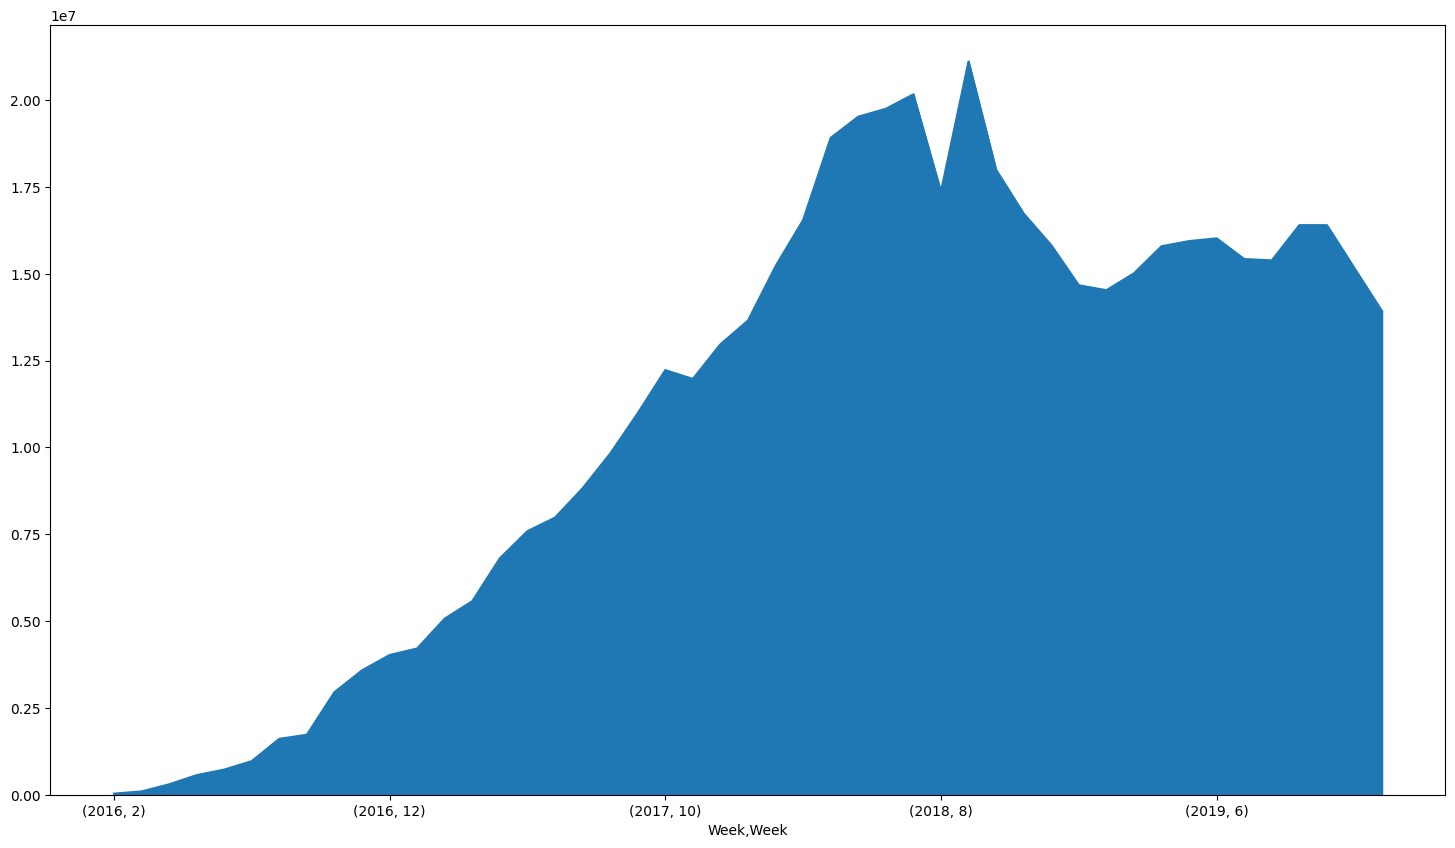

In [352]:
ax,fig = plt.subplots(1,1,figsize = (18,10))

df_usage['Sessions Per Week'].groupby([df_usage["Week"].dt.year, df_usage["Week"].dt.month]).mean().plot(kind="area")

We can see that the number of weekly sessions gradually increasing and it reaches peak around middle 2018 (roughly speaking, June or July) and after that it decreased a little bit 

<AxesSubplot:xlabel='Week,Week'>

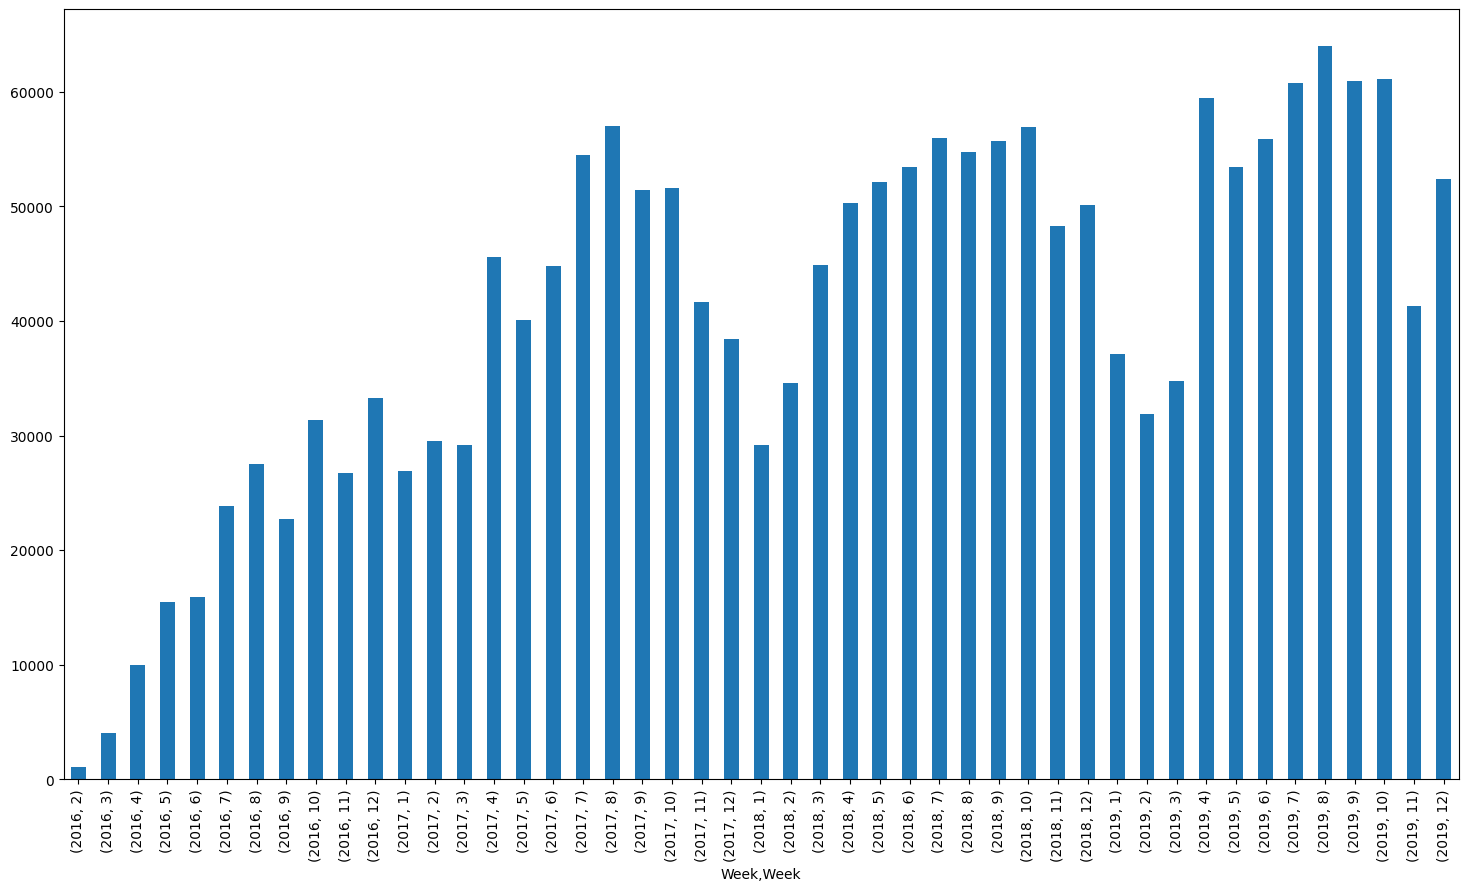

In [353]:
ax,fig = plt.subplots(1,1,figsize = (18,10))
df_usage['New Subscribers Per Week'].groupby([df_usage["Week"].dt.year,
                                              df_usage["Week"].dt.month]).mean().plot(kind="bar")

We can see that the weekly new users are inflated, and seems to reaches a peak during the summer of the year (roughly speaking, May til Oct) 

In [354]:
test

0      181.0
1      167.0
2      169.0
3      189.0
4      173.0
       ...  
195    297.0
196    279.0
197    303.0
198    314.0
199    314.0
Name: Average Session Duration, Length: 200, dtype: float64

<AxesSubplot:xlabel='Week,Week'>

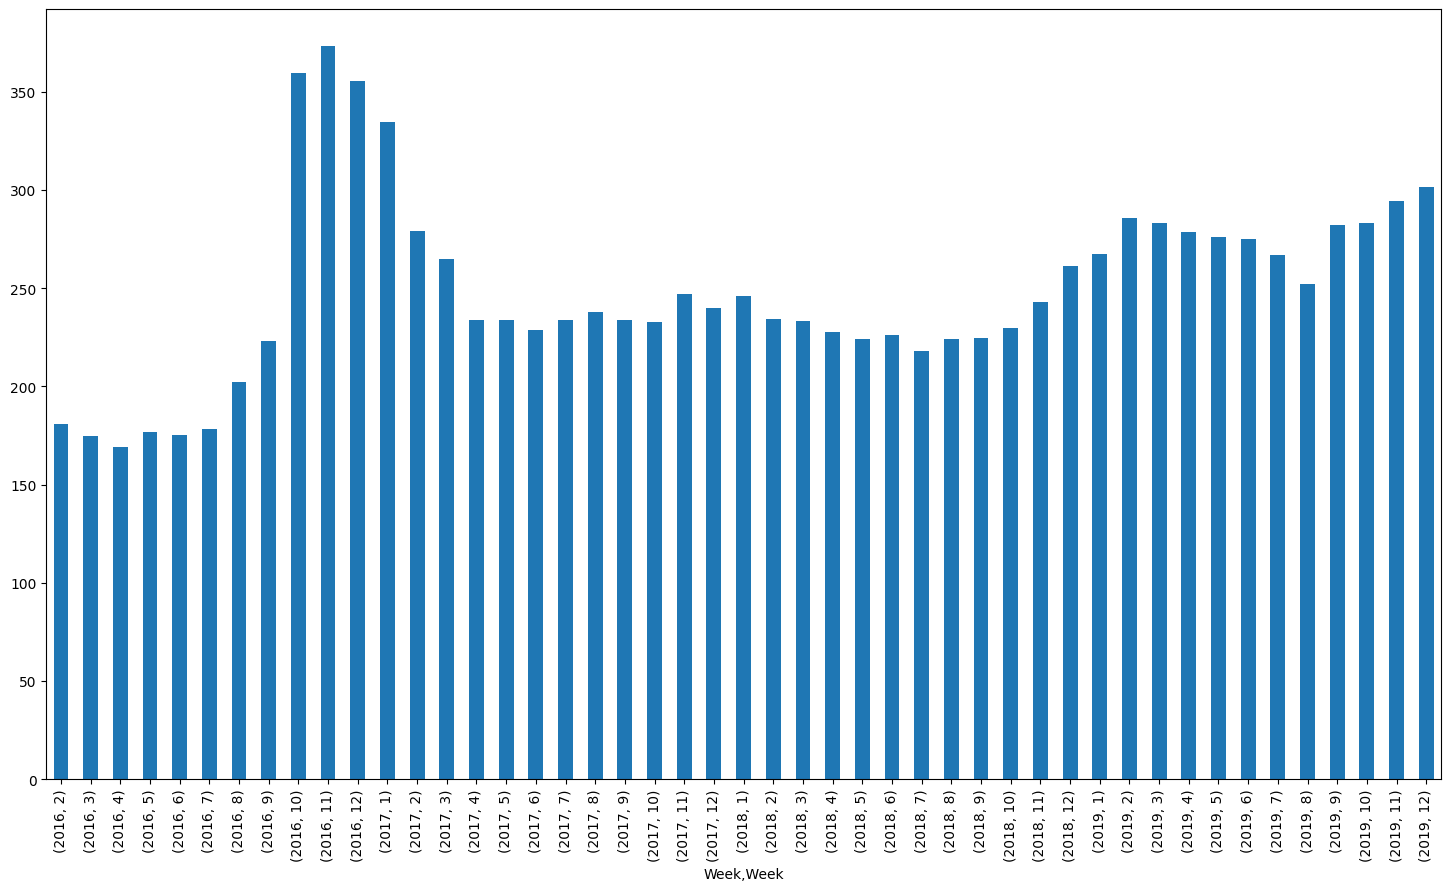

In [355]:
ax,fig = plt.subplots(1,1,figsize = (18,10))
df_usage['Usage_time'].groupby([df_usage["Week"].dt.year
                                ,df_usage["Week"].dt.month]).mean().plot(kind="bar")

The overall average usage time is pretty stable and it didn't change much over time 